### Homework 04: due 10/5 23:59

#### Cat and dog dataset
-Try various experiments.
-Try to achieve the best accuracy.

- Student ID: 20224049
- Name: Khan Zeeshan



In [38]:
# to ignore TF warning message (1)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# to ignore TF warning message (2)
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Split data into train/dev/test

In [39]:
import os, shutil

In [40]:
original_dataset_dir = './HW04/cats_and_dogs/Cat'
base_dir = './cats_and_dogs_small'

os.makedirs(base_dir, exist_ok=True)

In [41]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_dir, validation_dir, test_dir, train_cats_dir, train_dogs_dir, 
        validation_cats_dir, validation_dogs_dir, test_cats_dir, test_dogs_dir]

for dir_ in dirs:
    os.makedirs(dir_, exist_ok=True)

In [42]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [43]:
original_dataset_dir = './HW04/cats_and_dogs/Dog'
base_dir = './cats_and_dogs_small'

os.makedirs(base_dir, exist_ok=True)

In [44]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [45]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dogs images: 1000
total validation cat images: 500
total validation dogs images: 500
total test cat images: 500
total test dog images: 500


### Establishing a convolutional neural network to classify dogs and cats (1)

In [46]:
from keras import layers, models

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [49]:
from keras import optimizers

In [50]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [54]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [55]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [56]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 57s 564ms/step - loss: 0.6882 - acc: 0.5230 - val_loss: 0.6664 - val_acc: 0.5870
Epoch 2/30
100/100 [==============================] - 53s 535ms/step - loss: 0.6427 - acc: 0.6315 - val_loss: 0.6385 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 55s 547ms/step - loss: 0.5999 - acc: 0.6705 - val_loss: 0.6387 - val_acc: 0.6180
Epoch 4/30
100/100 [==============================] - 53s 529ms/step - loss: 0.5647 - acc: 0.7030 - val_loss: 0.6270 - val_acc: 0.6380
Epoch 5/30
100/100 [==============================] - 45s 451ms/step - loss: 0.5416 - acc: 0.7125 - val_loss: 0.5793 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 45s 450ms/step - loss: 0.5115 - acc: 0.7435 - val_loss: 0.5905 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 45s 451ms/step - loss: 0.4862 - acc: 0.7630 - val_loss: 0.5746 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 45s 452ms/st

In [57]:
import matplotlib.pyplot as plt

In [58]:
def loss_acc_graph(epochs, loss, val_loss, acc, val_acc):
    plt.clf() 
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'o--', label='Training Loss')
    plt.plot(epochs, val_loss, 'o-', label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'o--', label='Training Acc.')
    plt.plot(epochs, val_acc, 'o-', label='Validation Acc.')
    plt.title('Acc.')
    plt.xlabel('Epochs')
    plt.ylabel('Acc.')
    plt.legend()

    plt.show()
    
    print('max(train_acc)', max(acc), 'max(val_acc)', max(val_acc))

<Figure size 640x480 with 0 Axes>

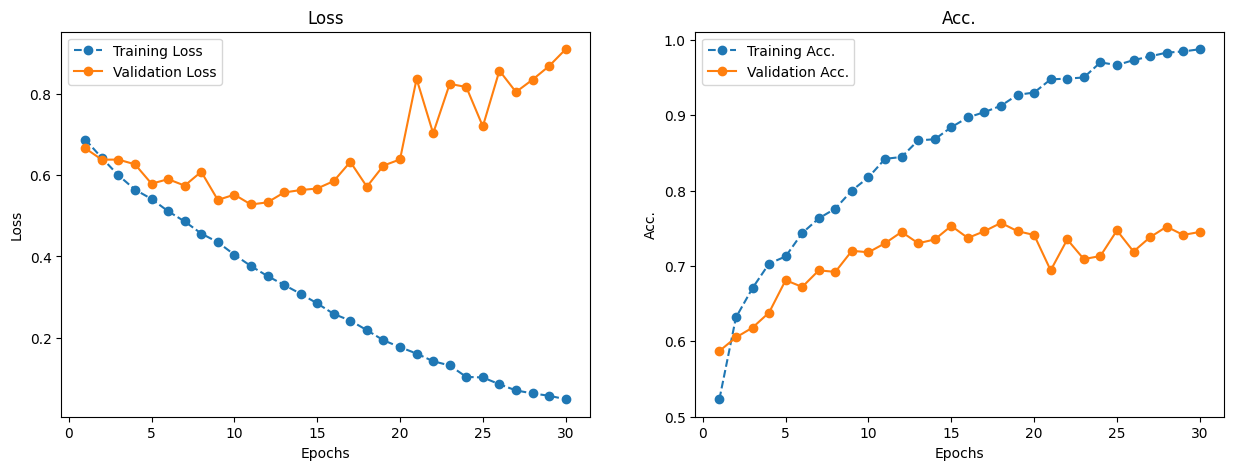

max(train_acc) 0.987500011920929 max(val_acc) 0.7570000290870667


In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

In [60]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [61]:
from tensorflow.keras.preprocessing import image

In [62]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

In [63]:
img_path = fnames[5]

In [64]:
img = image.load_img(img_path, target_size=(150, 150))

In [65]:
x = image.img_to_array(img)

In [66]:
x = x.reshape((1,) + x.shape)

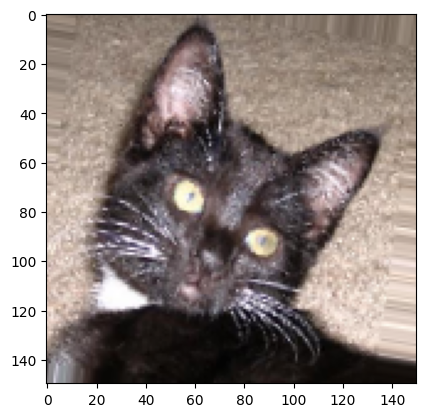

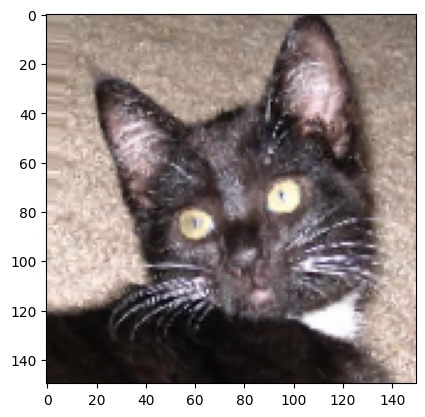

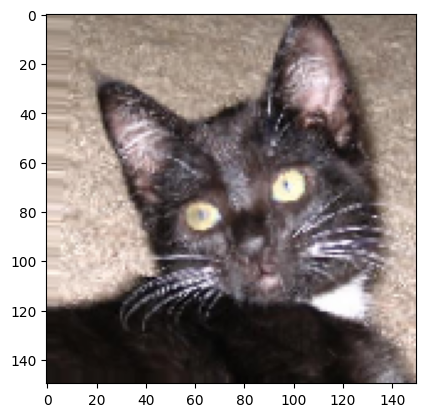

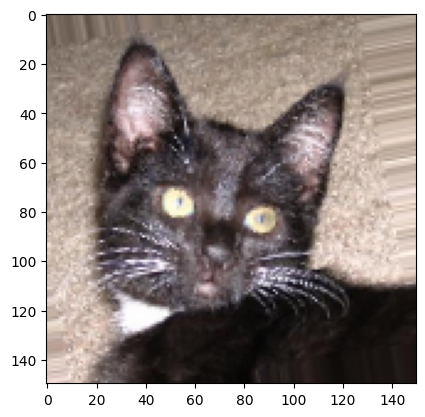

In [67]:
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
    if i == 3:
        break

plt.show()

### Establishing of convolutional neural network to classify dogs and cats (2)

In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 40s 386ms/step - loss: 0.6949 - acc: 0.5135 - val_loss: 0.6919 - val_acc: 0.5000


<Figure size 640x480 with 0 Axes>

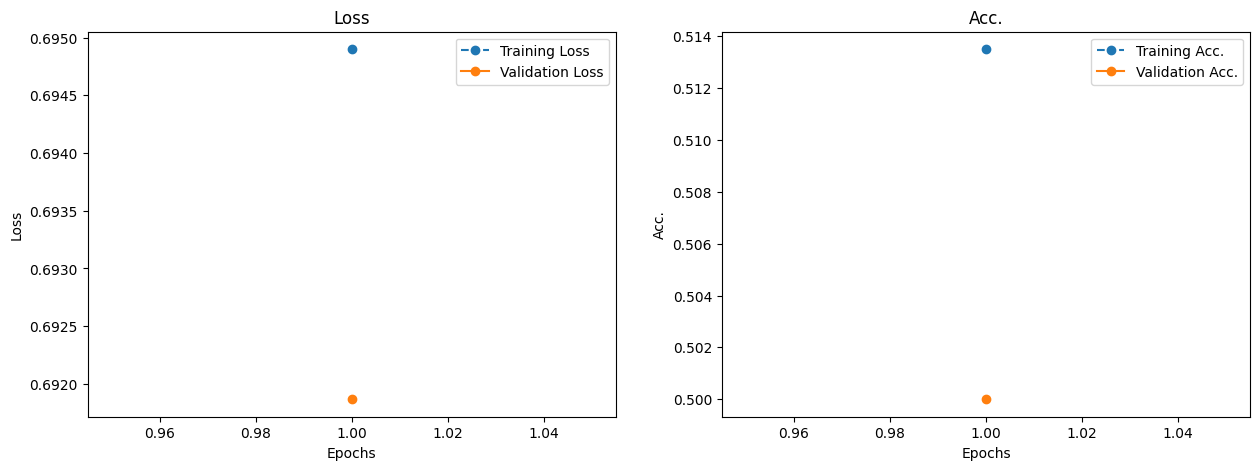

max(train_acc) 0.5134999752044678 max(val_acc) 0.5


In [70]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

### Establishing a convolutional neural network to classify dogs and cats (3) - VGG16.

In [71]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [72]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [73]:
import numpy as np

In [74]:
base_dir = './cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 691ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 710ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 703ms/step


In [75]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [76]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 26ms/step - loss: 0.5935 - acc: 0.6695 - val_loss: 0.4437 - val_acc: 0.8420
Epoch 2/30
100/100 [==============================] - 2s 25ms/step - loss: 0.4245 - acc: 0.8125 - val_loss: 0.3601 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 3s 25ms/step - loss: 0.3560 - acc: 0.8495 - val_loss: 0.3338 - val_acc: 0.8660
Epoch 4/30
100/100 [==============================] - 2s 25ms/step - loss: 0.3132 - acc: 0.8770 - val_loss: 0.2983 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2882 - acc: 0.8890 - val_loss: 0.2911 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2625 - acc: 0.8975 - val_loss: 0.2711 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 0.2455 - acc: 0.9080 - val_loss: 0.2656 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 2s 25ms/step - 

<Figure size 640x480 with 0 Axes>

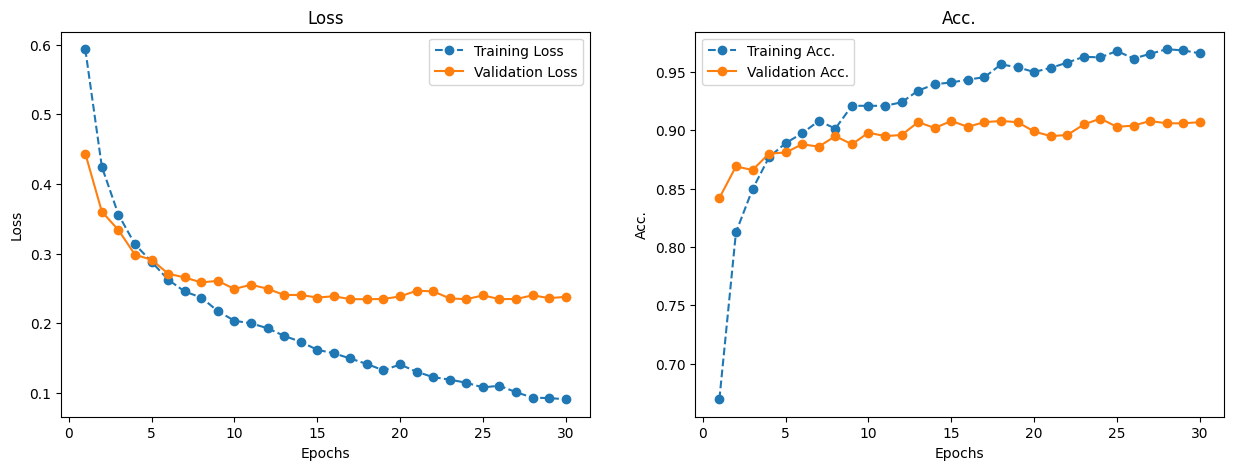

max(train_acc) 0.9695000052452087 max(val_acc) 0.9100000262260437


In [77]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

### VGG16 + augmentation

In [78]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [80]:
print('Number of weights to be trained before freezing the conv_base', 
      len(model.trainable_weights))

Number of weights to be trained before freezing the conv_base 30


In [81]:
conv_base.trainable = False

In [82]:
print('Number of weights to be trained after freezing the conv_base:', 
      len(model.trainable_weights))

Number of weights to be trained after freezing the conv_base: 4


In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [86]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# Verification data should not be multiplied!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Target directory.
        train_dir,
        # Change the size of all images to 150 x 150.
        target_size=(150, 150),
        batch_size=20,
        # Binary_crossentropy loss requires a binary label.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

<Figure size 640x480 with 0 Axes>

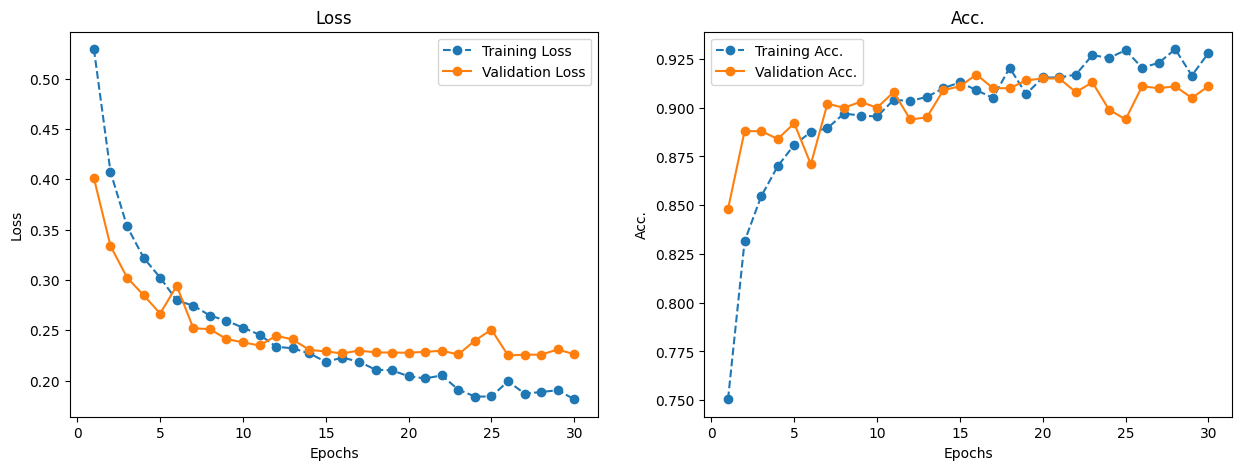

max(train_acc) 0.9300000071525574 max(val_acc) 0.9169999957084656


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

### VGG16 + augmentation + fine-tuning

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


100/100 [==============================] - 187s 2s/step - loss: 0.4602 - acc: 0.7970 - val_loss: 0.2852 - val_acc: 0.8760
Epoch 2/100
100/100 [==============================] - 179s 2s/step - loss: 0.2782 - acc: 0.8860 - val_loss: 0.2230 - val_acc: 0.9080
Epoch 3/100
100/100 [==============================] - 190s 2s/step - loss: 0.2337 - acc: 0.9010 - val_loss: 0.2009 - val_acc: 0.9130
Epoch 4/100
100/100 [==============================] - 221s 2s/step - loss: 0.2099 - acc: 0.9190 - val_loss: 0.2016 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 177s 2s/step - loss: 0.1834 - acc: 0.9280 - val_loss: 0.1837 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 185s 2s/step - loss: 0.1669 - acc: 0.9345 - val_loss: 0.2138 - val_acc: 0.9100
Epoch 7/100
100/100 [==============================] - 149s 1s/step - loss: 0.1394 - acc: 0.9435 - val_loss: 0.1887 - val_acc: 0.9240
Epoch 8/100
100/100 [==============================] - 166s 2s/step - loss

<Figure size 640x480 with 0 Axes>

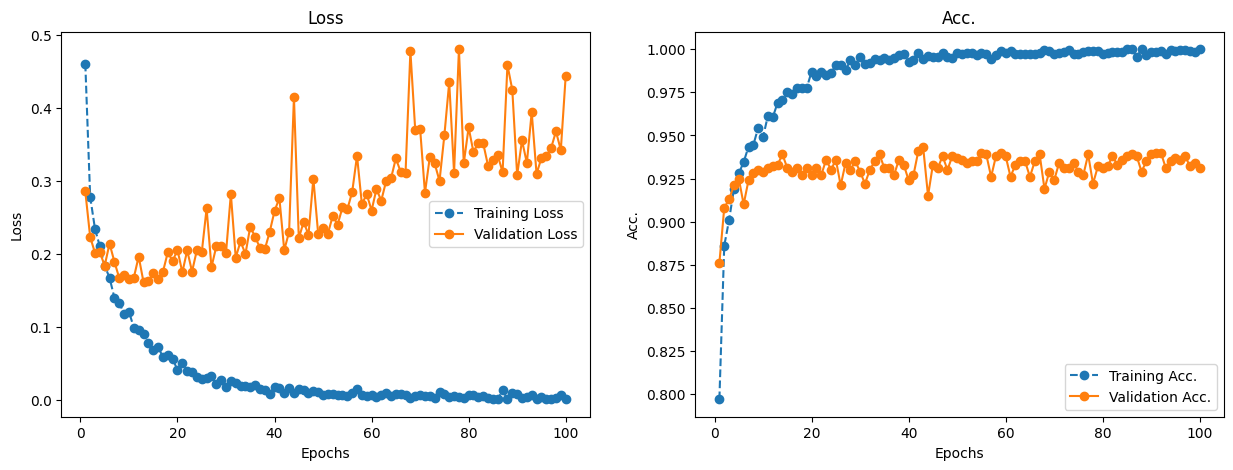

max(train_acc) 1.0 max(val_acc) 0.9430000185966492


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9359999895095825


### Additional Experiment (1) - Focal Loss

In [ ]:
from keras import backend as K

def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Define epsilon so that the back-propagation will not result in NaN for 0 divisor case
        epsilon = K.epsilon()
        # Add the epsilon to prediction value
        # y_pred = y_pred + epsilon
        # Clip the prediciton value
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        # Calculate p_t
        p_t = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        # Calculate alpha_t
        alpha_factor = K.ones_like(y_true) * alpha
        alpha_t = tf.where(K.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
        # Calculate cross entropy
        cross_entropy = -K.log(p_t)
        weight = alpha_t * K.pow((1 - p_t), gamma)
        # Calculate focal loss
        loss = weight * cross_entropy
        # Sum the losses in mini_batch
        loss = K.mean(K.sum(loss, axis=1))
        return loss

    return binary_focal_loss_fixed

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/100
100/100 [==============================] - 192s 2s/step - loss: 0.0219 - acc: 0.9315 - val_loss: 0.0243 - val_acc: 0.9420
Epoch 2/100
100/100 [==============================] - 171s 2s/step - loss: 0.0045 - acc: 0.9830 - val_loss: 0.0392 - val_acc: 0.9400
Epoch 3/100
100/100 [==============================] - 158s 2s/step - loss: 0.0030 - acc: 0.9885 - val_loss: 0.0300 - val_acc: 0.9390
Epoch 4/100
100/100 [==============================] - 169s 2s/step - loss: 0.0015 - acc: 0.9935 - val_loss: 0.0304 - val_acc: 0.9240
Epoch 5/100
100/100 [==============================] - 150s 2s/step - loss: 0.0022 - acc: 0.9905 - val_loss: 0.0545 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 167s 2s/step - loss: 0.0019 - acc: 0.9945 - val_loss: 0.0338 - val_acc: 0.9410
Epoch 7/100
100/100 [==============================] - 191s 2s/step - loss: 9.7848e-04 - acc: 0.9975 - val_loss: 0.0286 - val_acc: 0.9360
Epoch 8/100
100/100 [==============================] - 175

<Figure size 640x480 with 0 Axes>

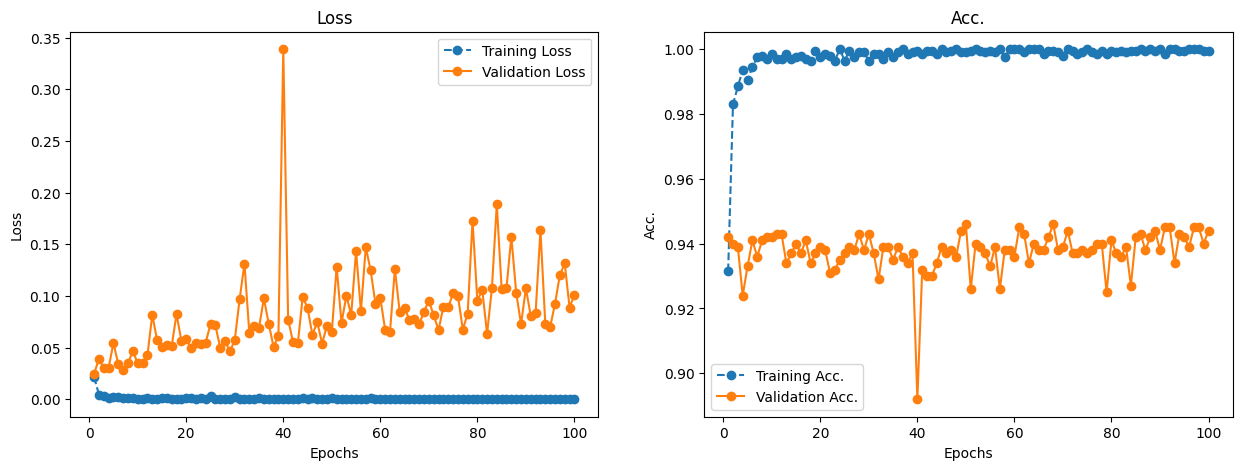

max(train_acc) 1.0 max(val_acc) 0.9459999799728394


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=[binary_focal_loss(gamma=2., alpha=.25)],
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9359999895095825


### Additional Experiment (2) - L2 Regularization

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/100
100/100 [==============================] - 152s 2s/step - loss: 46.7534 - acc: 0.9265 - val_loss: 44.1214 - val_acc: 0.9370
Epoch 2/100
100/100 [==============================] - 152s 2s/step - loss: 41.6405 - acc: 0.9890 - val_loss: 39.2060 - val_acc: 0.9400
Epoch 3/100
100/100 [==============================] - 152s 2s/step - loss: 36.9175 - acc: 0.9890 - val_loss: 34.6771 - val_acc: 0.9350
Epoch 4/100
100/100 [==============================] - 151s 2s/step - loss: 32.5577 - acc: 0.9935 - val_loss: 30.4949 - val_acc: 0.9340
Epoch 5/100
100/100 [==============================] - 151s 2s/step - loss: 28.5546 - acc: 0.9920 - val_loss: 26.6740 - val_acc: 0.9400
Epoch 6/100
100/100 [==============================] - 510s 5s/step - loss: 24.8945 - acc: 0.9965 - val_loss: 23.1839 - val_acc: 0.9420
Epoch 7/100
100/100 [==============================] - 151s 2s/step - loss: 21.5588 - acc: 0.9965 - val_loss: 20.0084 - val_acc: 0.9030
Epoch 8/100
100/100 [===========================

<Figure size 640x480 with 0 Axes>

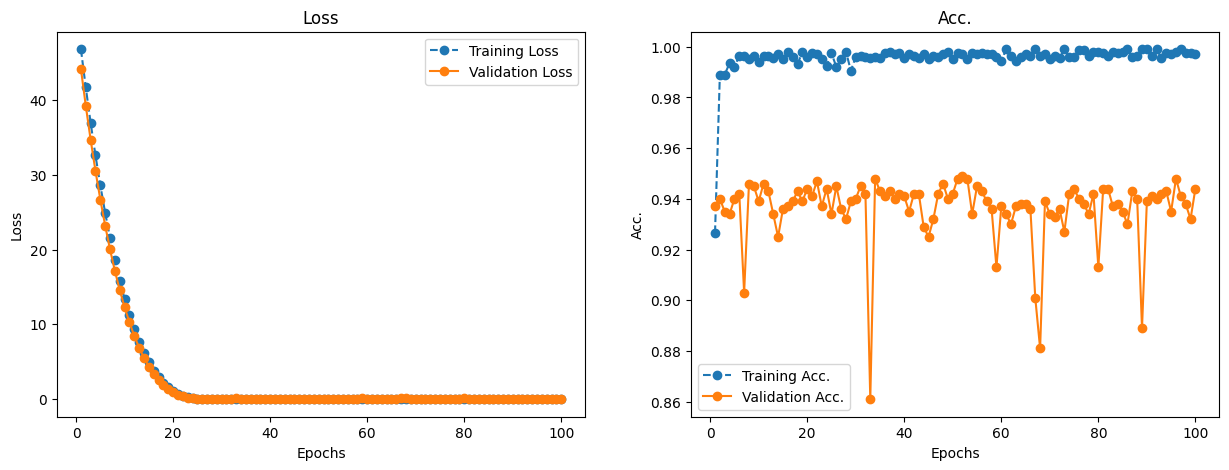

max(train_acc) 0.9990000128746033 max(val_acc) 0.9490000009536743


In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-1)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=[binary_focal_loss(gamma=2., alpha=.25)],
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9279999732971191


### Additional Experiment (3) - Dropout

Epoch 1/100


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 154s 2s/step - loss: 0.0172 - acc: 0.9700 - val_loss: 0.0877 - val_acc: 0.9390
Epoch 2/100
100/100 [==============================] - 511s 5s/step - loss: 0.0039 - acc: 0.9940 - val_loss: 0.1842 - val_acc: 0.9210
Epoch 3/100
100/100 [==============================] - 150s 1s/step - loss: 0.0021 - acc: 0.9945 - val_loss: 0.0634 - val_acc: 0.9360
Epoch 4/100
100/100 [==============================] - 150s 2s/step - loss: 0.0011 - acc: 0.9975 - val_loss: 0.0809 - val_acc: 0.9430
Epoch 5/100
100/100 [==============================] - 150s 2s/step - loss: 3.9892e-04 - acc: 0.9985 - val_loss: 0.1938 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 150s 2s/step - loss: 0.0011 - acc: 0.9985 - val_loss: 0.0981 - val_acc: 0.9410
Epoch 7/100
100/100 [==============================] - 147s 1s/step - loss: 1.2887e-04 - acc: 0.9990 - val_loss: 0.2125 - val_acc: 0.9260
Epoch 8/100
100/100 [==============================] - 147s 1s/ste

<Figure size 640x480 with 0 Axes>

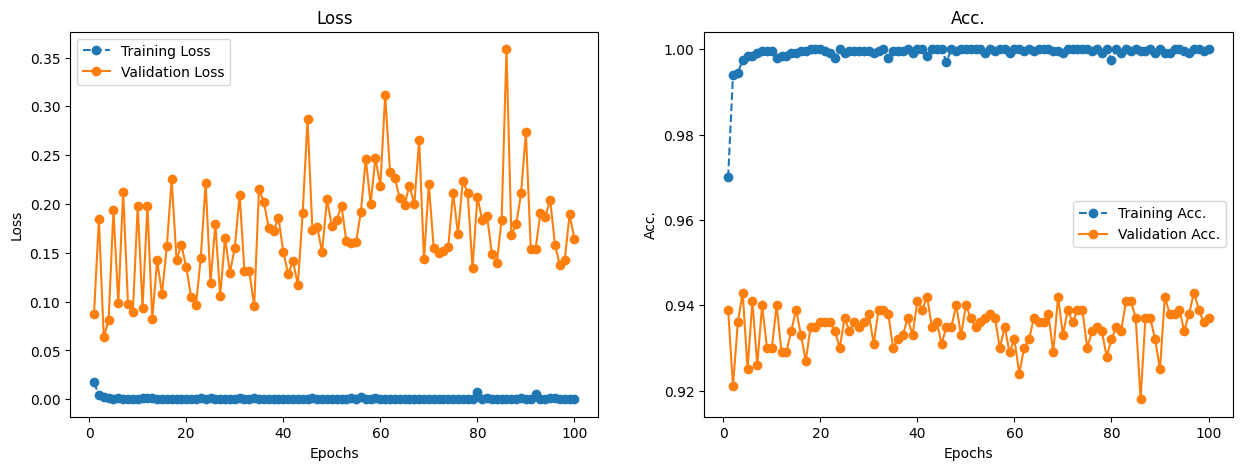

max(train_acc) 1.0 max(val_acc) 0.9430000185966492


In [ ]:
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=[binary_focal_loss(gamma=2., alpha=.25)],
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9330000281333923


### Additional Experiment (4) - Batch Normalizataion + drop out /wo pretrained weights

In [ ]:
from keras.layers import BatchNormalization

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
200/200 [==============================] - 83s 400ms/step - loss: 0.9646 - acc: 0.5585 - val_loss: 0.7804 - val_acc: 0.5000


<Figure size 640x480 with 0 Axes>

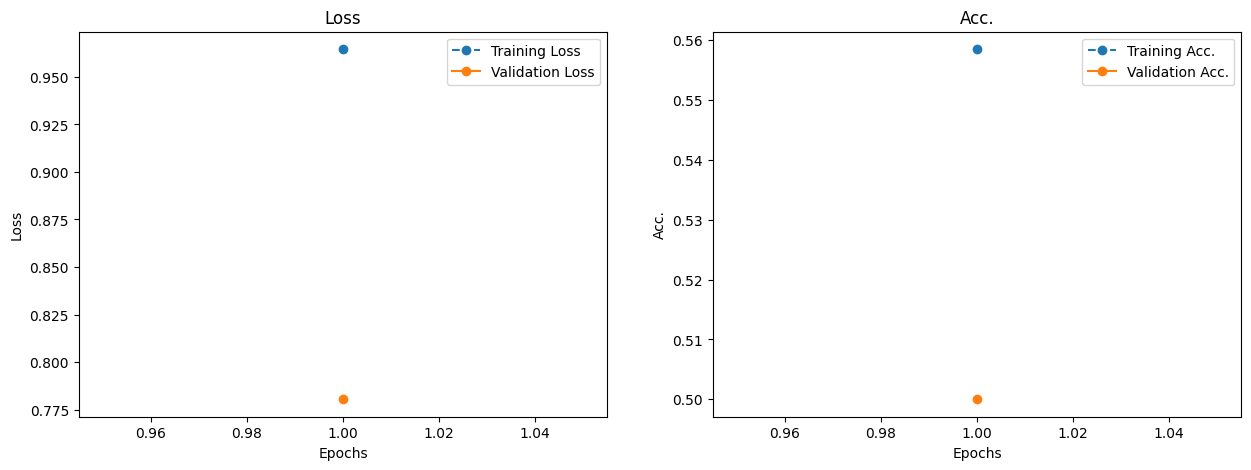

max(train_acc) 0.5584999918937683 max(val_acc) 0.5
Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:44: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


test acc: 0.5


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

### Additional Experiment (5) - Batch Normalizataion + drop out + he normalization /wo pretrained weights

c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
200/200 [==============================] - 73s 359ms/step - loss: 0.9267 - acc: 0.5600 - val_loss: 0.7207 - val_acc: 0.5000


<Figure size 640x480 with 0 Axes>

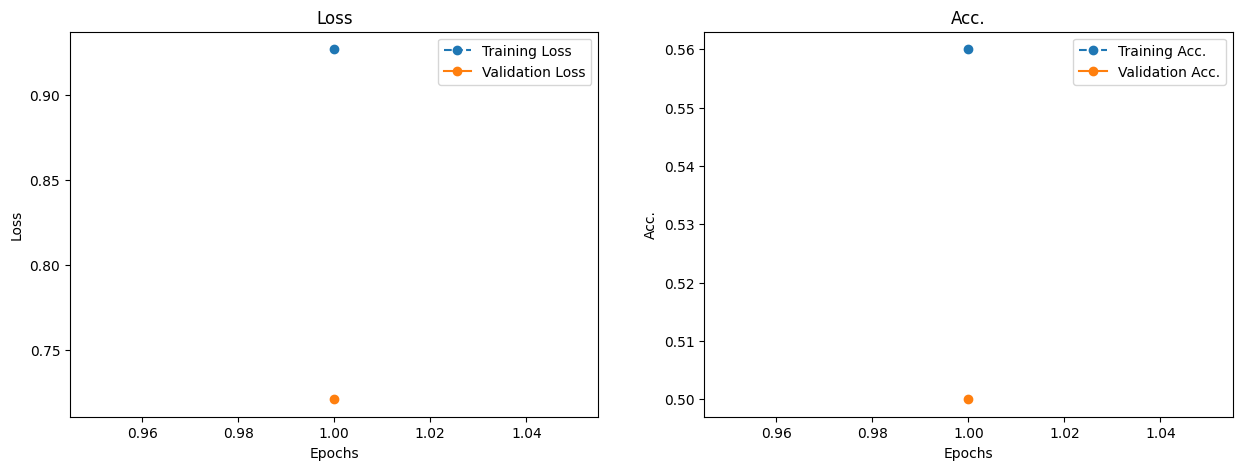

max(train_acc) 0.5600000023841858 max(val_acc) 0.5
Found 1000 images belonging to 2 classes.


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:44: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


test acc: 0.5


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

loss_acc_graph(epochs, loss, val_loss, acc, val_acc)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)